In [246]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# File to Load (Remember to Change These)
restaurant_data = "Data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv"
#rat_data = "Rat_Sightings.csv"

restaurant_data = pd.read_csv(restaurant_data)
#rat_data = pd.read_csv(rat_data)

restaurant_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [247]:
# Get the number of critical violations each restaurant has received

restaurant_data_1 = restaurant_data.loc[restaurant_data["CRITICAL FLAG"] == "Critical",:]
critical_violations_count = restaurant_data_1.groupby(restaurant_data_1["CAMIS"]).count()["CRITICAL FLAG"]

critical_violations_count.head()

CAMIS
30075445     3
30112340    13
30191841     7
40356018     2
40356151     8
Name: CRITICAL FLAG, dtype: int64

In [248]:
sorted_restaurant_data = restaurant_data_1.sort_values("INSPECTION DATE")
sorted_restaurant_data = sorted_restaurant_data.drop_duplicates(subset = "CAMIS", keep = "last")
sorted_restaurant_data = sorted_restaurant_data[["CAMIS","DBA","BORO","BUILDING","STREET","ZIPCODE","CUISINE DESCRIPTION","GRADE","GRADE DATE"]]
sorted_restaurant_data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,GRADE,GRADE DATE
211966,50057961,Sunnyside Taco,QUEENS,4222,GREENPOINT AVE,11104.0,Mexican,A,01/03/2017
118053,50056895,MAXWELLS CHOPHOUSE NY,MANHATTAN,1182,BROADWAY,10001.0,American,A,01/03/2017
253465,50057019,PARIS BAGUETTE,QUEENS,4522,46TH ST,11104.0,Bakery,A,01/03/2017
220854,50057566,DOMINO'S,QUEENS,24722D,S CONDUIT AVE,11422.0,Pizza,NaN,NaN
273148,50050701,FREDERICK SOUL HOLE,QUEENS,23316A,MERRICK BLVD,11422.0,Soul Food,A,01/03/2017
...,...,...,...,...,...,...,...,...,...
261534,41684056,LA MAISON DU CROQUE MONSIEUR,MANHATTAN,17,EAST 13 STREET,10003.0,French,NaN,NaN
89109,40545741,BOB'S STEAK & CHOP HOUSE,MANHATTAN,21,EAST 52 STREET,10022.0,American,NaN,NaN
177401,40367789,DANI PIZZA AND RESTAURANT,QUEENS,8128,LEFFERTS BOULEVARD,11415.0,Pizza,NaN,NaN
18414,41339289,THE GOOD FORK,BROOKLYN,391,VAN BRUNT STREET,11231.0,American,A,12/31/2016


In [249]:
restaurant_summary = pd.merge(sorted_restaurant_data,critical_violations_count,how = "left", on = ["CAMIS","CAMIS"])
restaurant_summary = restaurant_summary.rename(columns  = {"CRITICAL FLAG":"Count of Violations"})


In [250]:
Rat_Sightings = pd.read_csv("Data/Rat_Sightings.csv")
Rat_Sightings = Rat_Sightings.rename(columns  = {"Incident Zip":"ZIPCODE"})
Rat_Sightings.head()

,ZIPCODE,Rat Sightings
0,10000.0,3
1,10001.0,383
2,10002.0,1299
3,10003.0,627
4,10004.0,40


In [251]:
restaurant_summary = pd.merge(restaurant_summary,Rat_Sightings,how = "left", on = ["ZIPCODE","ZIPCODE"])

In [252]:
#need to clear NA's out of violations, rat sightings, Grade

restaurant_summary = restaurant_summary.dropna(subset=['GRADE'])
restaurant_summary = restaurant_summary.dropna(subset=['Count of Violations'])
restaurant_summary = restaurant_summary.dropna(subset=['Rat Sightings'])

pd.options.mode.chained_assignment = None 
restaurant_summary["Rat Sightings"] = restaurant_summary["Rat Sightings"].astype(int)
restaurant_summary["ZIPCODE"] = restaurant_summary["ZIPCODE"].astype(int)
restaurant_summary.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,GRADE,GRADE DATE,Count of Violations,Rat Sightings
0,50057961,Sunnyside Taco,QUEENS,4222,GREENPOINT AVE,11104,Mexican,A,01/03/2017,1,186
1,50056895,MAXWELLS CHOPHOUSE NY,MANHATTAN,1182,BROADWAY,10001,American,A,01/03/2017,1,383
2,50057019,PARIS BAGUETTE,QUEENS,4522,46TH ST,11104,Bakery,A,01/03/2017,1,186
4,50050701,FREDERICK SOUL HOLE,QUEENS,23316A,MERRICK BLVD,11422,Soul Food,A,01/03/2017,1,107
5,50057533,DUNKIN DONUTS,MANHATTAN,750,8TH AVE,10036,Donuts,A,01/03/2017,1,533


In [266]:
restaurant_summary["Grade Value"] = 0
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "A"] = 3
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "B"] = 2
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "C"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "Z"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "Not Yet Graded"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "P"] = 0

#Rat Sightings Value

rat_bin = [0,100,250,500,1000,2000,5000]
rat_grade = ["5","4","3","2","1","0"]

restaurant_summary["RT Value"] = pd.cut(restaurant_summary["Rat Sightings"],rat_bin, labels = rat_grade)

#Violations Value

vio_bin = [0,2,5,10,20,30,100]
vio_grade = ["5","4","3","2","1","0"]

restaurant_summary["Vio Value"] = pd.cut(restaurant_summary["Count of Violations"],vio_bin, labels = vio_grade)

pd.options.mode.chained_assignment = None 
restaurant_summary["Vio Value"] = restaurant_summary["Vio Value"].astype(int)
restaurant_summary["RT Value"] = restaurant_summary["RT Value"].astype(int)

restaurant_summary["Grade(%)"] = (restaurant_summary["Grade Value"] + restaurant_summary["RT Value"] + restaurant_summary["Vio Value"])/13

restaurant_summary = restaurant_summary.sort_values(by = "Grade(%)",ascending = True)

restaurant_summary

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,GRADE,GRADE DATE,Count of Violations,Rat Sightings,Grade Value,RT Value,Vio Value,Grade(%)
20649,50015614,TOTAL AMAZING GRACE,BROOKLYN,3113,CHURCH AVE,11226,Caribbean,P,12/14/2016,35,1355,0,1,0,0.076923
20092,50006110,ARCO CAFE,MANHATTAN,886,AMSTERDAM AVE,10025,Italian,P,12/11/2015,25,2285,0,0,1,0.076923
17950,50005934,MIYAKO SUSHI,MANHATTAN,642,AMSTERDAM AVE,10025,Japanese,B,12/01/2015,33,2285,2,0,0,0.153846
23596,50000198,SZECHUAN GARDEN,MANHATTAN,239,W 105TH ST,10025,Chinese,C,12/28/2015,29,2285,1,0,1,0.153846
16450,40692120,NEW ROMA PIZZA,MANHATTAN,116,DELANCY STREET,10002,Pizza,C,11/18/2014,36,1299,1,1,0,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062,50012218,DUNKIN' DONUTS,MANHATTAN,90,BROAD ST,10004,Donuts,A,09/17/2014,2,40,3,5,5,1.000000
257,50045160,LENWICH,MANHATTAN,32,WATER ST,10004,Mexican,A,02/01/2017,2,40,3,5,5,1.000000
7164,50064971,MCDONALD'S,QUEENS,000,JFK INTL AIRPORT ERMINAL 1,11430,American,A,08/10/2017,1,10,3,5,5,1.000000
144,50002435,CIBO MARKET,QUEENS,NKA,JFK INTERNATIONAL AIRPORT,11430,Sandwiches/Salads/Mixed Buffet,A,01/21/2015,1,10,3,5,5,1.000000


In [312]:
#Boro table
boro = restaurant_summary[["BORO","Rat Sightings","Count of Violations","ZIPCODE"]]

boro_rats = boro.groupby("BORO")["Rat Sightings"].sum()
boro_rats = boro_rats.reset_index()
boro_rats = boro_rats.sort_values(by = "Rat Sightings",ascending = False)

boro_vio = boro.groupby("BORO")["Count of Violations"].sum()
boro_vio = boro_vio.reset_index()
boro_vio = boro_vio.sort_values(by = "Count of Violations",ascending = False)

boro_count = boro.groupby("BORO")["ZIPCODE"].count()
boro_count = boro_count.reset_index()
boro_count = boro_count.sort_values(by = "ZIPCODE",ascending = False)
boro_count

,BORO,ZIPCODE
2,MANHATTAN,7490
1,BROOKLYN,4706
3,QUEENS,4412
0,BRONX,1799
4,STATEN ISLAND,684


In [268]:
#cuisine table
cuisine = restaurant_summary[["CUISINE DESCRIPTION","Rat Sightings","Count of Violations"]]

cuisine_rats = cuisine.groupby("CUISINE DESCRIPTION")["Rat Sightings"].sum()
cuisine_rats = cuisine_rats.reset_index()
cuisine_rats = cuisine_rats.sort_values(by = "Rat Sightings",ascending = False)

cuisine_vio = cuisine.groupby("CUISINE DESCRIPTION")["Count of Violations"].sum()
cuisine_vio = cuisine_vio.reset_index()
cuisine_vio = cuisine_vio.sort_values(by = "Count of Violations",ascending = False)


In [269]:
grade = restaurant_summary[["GRADE","Rat Sightings","Count of Violations"]]

grade_rat = grade.groupby("GRADE")["Rat Sightings"].sum()
grade_rat = grade_rat.reset_index()

grade_vio = grade.groupby("GRADE")["Count of Violations"].sum()
grade_vio = grade_vio.reset_index()

Text(0.5, 0, 'Grade')

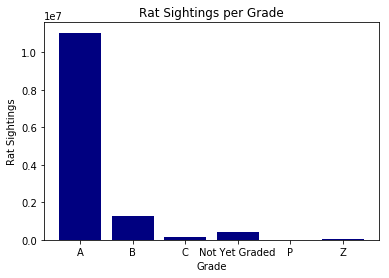

In [307]:
plt.bar(grade_rat["GRADE"],grade_rat["Rat Sightings"],align = "center", color = "navy")
plt.title("Rat Sightings per Grade")
plt.ylabel("Rat Sightings")
plt.xlabel("Grade")
plt.savefig("Rat Sightings Per Grade")


Text(0.5, 0, 'Grade')

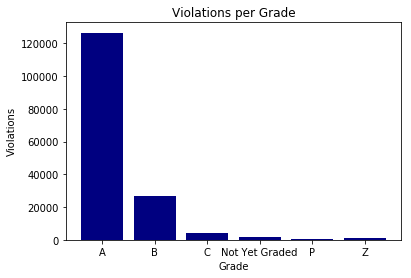

In [271]:
plt.bar(grade_vio["GRADE"],grade_vio["Count of Violations"],align = "center", color = "navy")
plt.title("Violations per Grade")
plt.ylabel("Violations")
plt.xlabel("Grade")
plt.savefid("Violations per Grade")

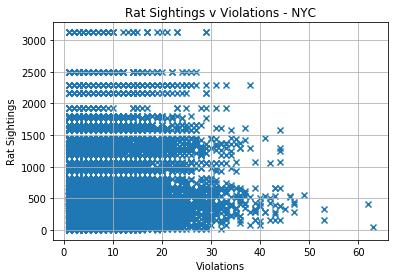

In [272]:
#total data 
plt.scatter(restaurant_summary["Count of Violations"],restaurant_summary["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - NYC")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - NYC")

In [273]:
#DF filtered by boro
restaurant_summary_bk = restaurant_summary[restaurant_summary["BORO"] == "BROOKLYN"]
restaurant_summary_qu = restaurant_summary[restaurant_summary["BORO"] == "QUEENS"]
restaurant_summary_bx = restaurant_summary[restaurant_summary["BORO"] == "BRONX"]
restaurant_summary_si = restaurant_summary[restaurant_summary["BORO"] == "STATEN ISLAND"]
restaurant_summary_mh = restaurant_summary[restaurant_summary["BORO"] == "MANHATTAN"]

In [301]:
restaurant_summary_bk_grade = restaurant_summary_bk[["BORO","CUISINE DESCRIPTION","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
restaurant_summary_bk_grade.head()

,BORO,CUISINE DESCRIPTION,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
20649,BROOKLYN,Caribbean,TOTAL AMAZING GRACE,3113,CHURCH AVE,11226,0.076923
19806,BROOKLYN,African,BUKA,946,FULTON STREET,11238,0.153846
24175,BROOKLYN,Japanese,MASAKI TERIYAKI & SUSHI,11,PUTNAM AVENUE,11238,0.153846
24508,BROOKLYN,Spanish,JC MAR RESTAURANT,736,NOSTRAND AVENUE,11216,0.153846
16871,BROOKLYN,Caribbean,THE HILLS RESTAURANT AND BAR,4706,CHURCH AVENUE,11203,0.230769


In [302]:
restaurant_summary_qu_grade = restaurant_summary_qu[["BORO","CUISINE DESCRIPTION","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
restaurant_summary_qu_grade.head()

,BORO,CUISINE DESCRIPTION,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
21379,QUEENS,"Latin (Cuban, Dominican, Puerto Rican, South &...",JORGE'S RESTAURANT,689,SENECA AVENUE,11385,0.230769
13759,QUEENS,American,CHILI'S GRILL & BAR,8016,COOPER AVENUE,11385,0.307692
24484,QUEENS,Filipino,SARILING ATIN,8912,QUEENS BLVD,11373,0.307692
8493,QUEENS,Pizza,DOMINO'S,815,ONDERDONK AVENUE,11385,0.307692
17193,QUEENS,American,FRESH TO YOU,7509,WOODHAVEN BOULEVARD,11385,0.307692


In [303]:
restaurant_summary_bx_grade = restaurant_summary_bx[["BORO","CUISINE DESCRIPTION","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
restaurant_summary_bx_grade.head()

,BORO,CUISINE DESCRIPTION,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
21909,BRONX,Spanish,EL NUEVO ROBLE BILLIARDS,216,E 170TH ST,10456,0.153846
21236,BRONX,American,TONY'S PIZZA,1014,LONGWOOD AVENUE,10459,0.153846
12425,BRONX,Mexican,PLAZA TULCINGO RESTAURANT,10,EAST CLARKE PLACE,10452,0.153846
18022,BRONX,Mexican,PANCHO VILLA RESTAURANT,2274,JEROME AVENUE,10453,0.230769
15506,BRONX,Bakery,DE LILLO PASTRY SHOP,610,EAST 187 STREET,10458,0.230769


In [304]:
restaurant_summary_si_grade = restaurant_summary_si[["BORO","CUISINE DESCRIPTION","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
restaurant_summary_si_grade.head()

,BORO,CUISINE DESCRIPTION,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
21140,STATEN ISLAND,Pizza,CHUCK E. CHEESE'S,1775,SOUTH AVENUE,10314,0.307692
21220,STATEN ISLAND,Chinese,NEW YUNG HONG,2491,VICTORY BLVD,10314,0.307692
15405,STATEN ISLAND,Asian,EAST PACIFIC,2655,RICHMOND AVENUE,10314,0.384615
13702,STATEN ISLAND,Italian,CAFE DEL MONDO,2530,VICTORY BOULEVARD,10314,0.384615
21475,STATEN ISLAND,Pizza/Italian,PACINI'S PIZZERIA,1650,RICHMOND AVENUE,10314,0.384615


In [305]:
restaurant_summary_mh_grade = restaurant_summary_mh[["BORO","CUISINE DESCRIPTION","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
restaurant_summary_mh_grade.head()

,BORO,CUISINE DESCRIPTION,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
20092,MANHATTAN,Italian,ARCO CAFE,886,AMSTERDAM AVE,10025,0.076923
17950,MANHATTAN,Japanese,MIYAKO SUSHI,642,AMSTERDAM AVE,10025,0.153846
23596,MANHATTAN,Chinese,SZECHUAN GARDEN,239,W 105TH ST,10025,0.153846
16450,MANHATTAN,Pizza,NEW ROMA PIZZA,116,DELANCY STREET,10002,0.153846
16035,MANHATTAN,Mexican,CASCABEL TAQUERIA,2799,BROADWAY,10025,0.153846


In [306]:
cuisine_grade = restaurant_summary[["CUISINE DESCRIPTION","BORO","DBA","BUILDING","STREET","ZIPCODE","Grade(%)"]]
cuisine_grade.head()

,CUISINE DESCRIPTION,BORO,DBA,BUILDING,STREET,ZIPCODE,Grade(%)
20649,Caribbean,BROOKLYN,TOTAL AMAZING GRACE,3113,CHURCH AVE,11226,0.076923
20092,Italian,MANHATTAN,ARCO CAFE,886,AMSTERDAM AVE,10025,0.076923
17950,Japanese,MANHATTAN,MIYAKO SUSHI,642,AMSTERDAM AVE,10025,0.153846
23596,Chinese,MANHATTAN,SZECHUAN GARDEN,239,W 105TH ST,10025,0.153846
16450,Pizza,MANHATTAN,NEW ROMA PIZZA,116,DELANCY STREET,10002,0.153846


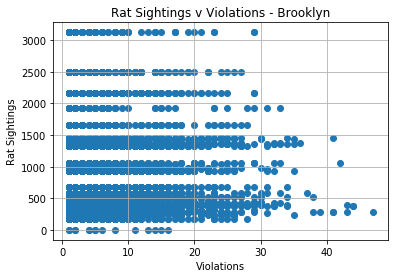

In [274]:
plt.scatter(restaurant_summary_bk["Count of Violations"],restaurant_summary_bk["Rat Sightings"],marker = "o")
plt.title("Rat Sightings v Violations - Brooklyn")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - Brooklyn")

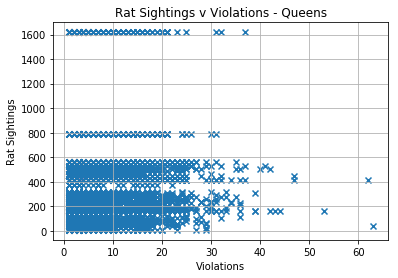

In [275]:
plt.scatter(restaurant_summary_qu["Count of Violations"],restaurant_summary_qu["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Queens")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - Queens")

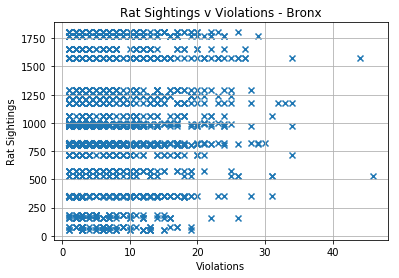

In [276]:
plt.scatter(restaurant_summary_bx["Count of Violations"],restaurant_summary_bx["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Bronx")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - Bronx")

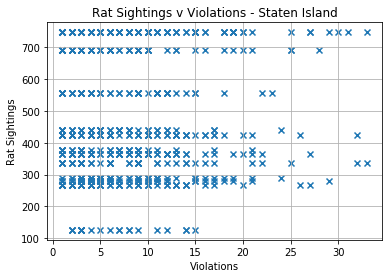

In [277]:
plt.scatter(restaurant_summary_si["Count of Violations"],restaurant_summary_si["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Staten Island")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - Staten Island")

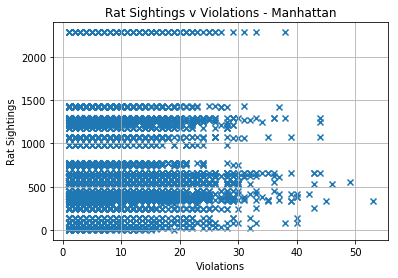

In [278]:
plt.scatter(restaurant_summary_mh["Count of Violations"],restaurant_summary_mh["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Manhattan")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)
plt.savefig("Rat Sightings v Violations - Manhattan")

In [ ]:
# restaurant_data_2 = pd.DataFrame(critical_violations_count)
#restaurant_data_2 = rest
#restaurant_data_2 = restaurant_data_2.reset_index()
#restaurant_data_2 = restaurant_data_2.sort_values(by = ["CRITICAL FLAG"], ascending = False)
#restaurant_data_2 = restaurant_data_2.drop_duplicates(["CAMIS"])
# len(restaurant_data_2)

# restaurant_data_2 = restaurant_data_1.sort_values(by= ,ascending = False)
# restaurant_data_2 = restaurant_data_2.drop_duplicates(["CAMIS"])

# restaurant_data_3 = pd.merge(restaurant_data_1,restaurant_data_2, on = "CAMIS")
# restaurant_data_3 = restaurant_data_3.drop_duplicates(["CAMIS"])